<a href="https://colab.research.google.com/github/VictorPopadynets/MathEssentials/blob/main/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B8_%D0%9F%D0%BE%D0%B2%D1%82%D0%BE%D1%80%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
train = pd.read_csv('train.csv')

# Обробка даних
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna('S')
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

train = pd.concat([
    train,
    pd.get_dummies(train['Sex'], drop_first=True),
    pd.get_dummies(train['Embarked'], drop_first=True),
    pd.get_dummies(train['Pclass'], prefix='Pclass', drop_first=True)
], axis=1)

train.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

X = train.drop('Survived', axis=1).values
y = train['Survived'].values

sc = StandardScaler()
X = sc.fit_transform(X)

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    m = len(y_true)
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

class MyLogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

        for i in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = compute_loss(y, y_pred)
            train_acc = np.mean((y_pred >= 0.5) == y)
            self.train_losses.append(loss)
            self.train_accuracies.append(train_acc)

            if X_val is not None and y_val is not None:
                val_pred = sigmoid(np.dot(X_val, self.weights) + self.bias)
                val_loss = compute_loss(y_val, val_pred)
                val_acc = np.mean((val_pred >= 0.5) == y_val)
                self.val_losses.append(val_loss)
                self.val_accuracies.append(val_acc)

            if i % 100 == 0:
                print(f"Epoch {i} - Train Loss: {loss:.4f} - Train Acc: {train_acc:.4f}", end="")
                if X_val is not None:
                    print(f" - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")
                else:
                    print()

    def predict_prob(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_prob(X) >= 0.5).astype(int)



Epoch 0 - Train Loss: 0.6931 - Train Acc: 0.3787 - Val Loss: 0.6790 - Val Acc: 0.7713
Epoch 100 - Train Loss: 0.4543 - Train Acc: 0.8039 - Val Loss: 0.4525 - Val Acc: 0.7892
Epoch 200 - Train Loss: 0.4456 - Train Acc: 0.8114 - Val Loss: 0.4397 - Val Acc: 0.7937
Epoch 300 - Train Loss: 0.4440 - Train Acc: 0.8099 - Val Loss: 0.4348 - Val Acc: 0.7937
Epoch 400 - Train Loss: 0.4434 - Train Acc: 0.8114 - Val Loss: 0.4318 - Val Acc: 0.7937
Epoch 500 - Train Loss: 0.4431 - Train Acc: 0.8114 - Val Loss: 0.4297 - Val Acc: 0.7937
Epoch 600 - Train Loss: 0.4429 - Train Acc: 0.8114 - Val Loss: 0.4281 - Val Acc: 0.7937
Epoch 700 - Train Loss: 0.4428 - Train Acc: 0.8099 - Val Loss: 0.4270 - Val Acc: 0.7937
Epoch 800 - Train Loss: 0.4428 - Train Acc: 0.8114 - Val Loss: 0.4261 - Val Acc: 0.7982
Epoch 900 - Train Loss: 0.4428 - Train Acc: 0.8114 - Val Loss: 0.4255 - Val Acc: 0.7982
Accuracy: 0.7982062780269058
Precision: 0.7682926829268293
Recall: 0.7078651685393258
F1 Score: 0.7368421052631579
Confusi

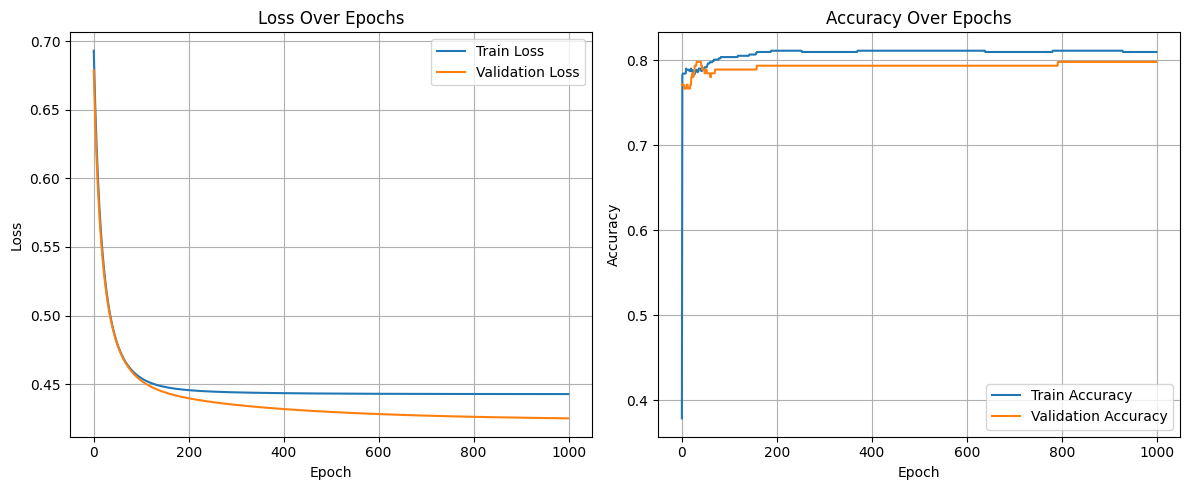

In [ ]:
# Навчання
model = MyLogisticRegression(lr=0.1, epochs=1000)
model.fit(X_train_train, y_train_train, X_val=X_train_test, y_val=y_train_test)

# Прогноз і метрики
y_pred = model.predict(X_train_test)
print("Accuracy:", accuracy_score(y_train_test, y_pred))
print("Precision:", precision_score(y_train_test, y_pred))
print("Recall:", recall_score(y_train_test, y_pred))
print("F1 Score:", f1_score(y_train_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train_test, y_pred))

# Побудова графіків
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model.train_losses, label='Train Loss')
plt.plot(model.val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model.train_accuracies, label='Train Accuracy')
plt.plot(model.val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Завантаження test.csv
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

# Обробка пропусків і створення ознак
test['Age'] = test['Age'].fillna(train['Age'].mean())
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())
test['Embarked'] = test['Embarked'].fillna('S')
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

# Видалення зайвих колонок
test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# One-hot кодування
test = pd.concat([
    test,
    pd.get_dummies(test['Sex'], drop_first=True),
    pd.get_dummies(test['Embarked'], drop_first=True),
    pd.get_dummies(test['Pclass'], prefix='Pclass', drop_first=True)
], axis=1)

test.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

# Вирівнювання колонок
missing_cols = set(train.drop('Survived', axis=1).columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0
test = test[train.drop('Survived', axis=1).columns]

# Масштабування тестового набору
X_test_final = sc.transform(test)

# Прогноз
y_test_pred = model.predict(X_test_final)

# Збереження submission.csv
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print(" Файл submission.csv збережено")


 Файл submission.csv збережено


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Збереження ваг та bias
np.save("weights.npy", model.weights)
np.save("bias.npy", model.bias)
